In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf


C:\Users\johir\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(28, 28)


C:\Users\johir\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(7, 7)


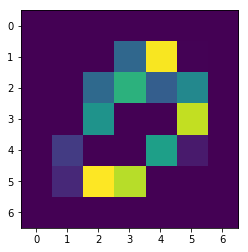

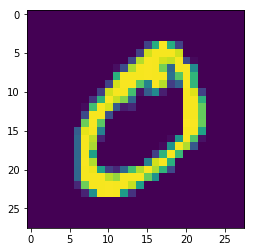

In [2]:
from skimage.transform import resize
(A, Ay), (B, By) = mnist.load_data()
x = A[1]
print(x.shape)
xr = resize(x, (7, 7))
print(xr.shape)
plt.imshow(xr)
plt.show()
plt.imshow(x)
plt.show()

In [3]:
def getdata(a,b,img_rows = 28, img_cols = 28):
    # the data, split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_zo = []
    y_zo = []
    for i in range(len(y_train)):
        if y_train[i] == a or y_train[i] == b:
            A = resize(x_train[i], (img_rows,  img_cols),mode='constant')
            Ay = y_train[i]#resize(y_train[i], (img_rows, img_cols))
            x_zo.append(A)
            y_zo.append(Ay)
    xt_zo = []
    yt_zo = []

    for i in range(len(y_test)):
        if y_test[i] == a or y_test[i] == b:
            A = resize(x_test[i], (img_rows,  img_cols),mode='constant')
            Ay = y_test[i]#resize(y_train[i], (img_rows, img_cols))
            xt_zo.append(A)
            yt_zo.append(Ay)
    x_zo = np.array(x_zo)
    y_zo = np.array(y_zo)
    xt_zo = np.array(xt_zo)
    yt_zo = np.array(yt_zo)
    return x_zo, y_zo, xt_zo, yt_zo

In [4]:
def train(x_zo,y_zo,xt_zo,yt_zo,img_rows = 28, img_cols = 28,numclass = 2):
    if K.image_data_format() == 'channels_first':
        x_zo = x_zo.reshape(x_zo.shape[0], 1, img_rows, img_cols)
        xt_zo = xt_zo.reshape(xt_zo.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_zo = x_zo.reshape(x_zo.shape[0], img_rows, img_cols, 1)
        xt_zo = xt_zo.reshape(xt_zo.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_zo.astype('float32')
    x_test = xt_zo.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_zo.shape,x_train.shape[0], 'train samples', y_zo.shape)
    print(x_test.shape[0], 'test samples')

    y_train = y_zo#keras.utils.to_categorical(y_zo, numclass )
    y_test =  yt_zo#keras.utils.to_categorical(yt_zo, numclass)

    print(y_zo.shape,y_train.shape)
    nm = keras.Sequential([
        keras.layers.Flatten(input_shape=(img_rows, img_cols,1), name = "Input"),
        keras.layers.Dense(7, activation=tf.nn.relu ,name = "H"),
        keras.layers.Dense(numclass, activation=tf.nn.softmax, name = "output")
    ])

    nm.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    nm.fit(x_train, y_train, epochs=10)
    return nm, x_test, y_test

In [5]:
from graphviz import Graph, render

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference
def getLabel(y):
    one = [0, 1]
    zer= [1 , 0]
    if y == 1:
        return 1
    elif y == 0:
        return 0
    elif (y == one).all():
        return 1
    else:
        return 0
def vispredict(nm, x, y,img_rows = 28, img_cols = 28):
    w1,b1 = nm.layers[1].get_weights()
    w2,b2 = nm.layers[2].get_weights()
    W1 = np.vstack([w1])
    print(W1.shape)
    X = x.reshape(img_rows*img_cols,)
    X1 = np.dot(X,W1)
    X1 = np.add(X1, b1)
    X1[X1<0]=0
    W2 = np.vstack([w2])
    X2 = np.dot(X1,W2)
    X2 = np.add(X2,b2)
    X2 = softmax(X2)
    dot = Graph(format='png')
    #dot.attr(bgcolor='purple:pink', kw = "edge", style = "invis",nodesep = "0")
    dot.attr(bgcolor='purple:pink', kw = "edge", color = "yellow",nodesep = "0")
    dot.attr(kw = "graph", nodesep = "0", ranksep = "0")
    
    color = ["red","green"]
    green = ["springgreen","springgreen1","springgreen2","springgreen3","springgreen4"]
    edgep = ["springgreen","springgreen1","springgreen2","springgreen3","springgreen4"]
    edgen = ["rosybrown1", "salmon", "orange", "orangered", "red", "red3"]
    dot.node('I',str(getLabel(y)),color = "blue",style = "filled",**{'width':str(.2), 'height':str(.2)})
    maxa = np.amax(X)
    maxc = np.amax(X1)
    maxd = np.amax(X2)
    print(maxa,maxc,maxd)
    A = []
    s = .2
    
    
    for i in range(X.shape[0]):
        if X[i] > 0:
            ind = int((X[i])//(maxa/4))
            #print(ind,X[i])
            c = green[ind]
            dot.node('x_'+str(i), str(X[i]), color = c,fillcolor = c, style  = "filled",**{'width':str(s), 'height':str(s)})
        else :
             dot.node('x_'+str(i), str(X[i]), color = color[0], style  = "filled",**{'width':str(s), 'height':str(s)})
    E = []
    total = 0
    for j in range(X.shape[0]):
        total += 1
        #if X[j] > 0:
        #E.append(('I','x_'+str(j))) # May need uncommenting
        dot.edge('I','x_'+str(j), style ="invis")
        

    #print(len(E),total,100*len(E)/total)
    #A.append(100*len(E)/total)
    #dot.edges(E) # My need uncommenting
    for i in range(X1.shape[0]):
        if X1[i] > 0:
            ind = int((X1[i])//(maxc/4))
            c = green[ind]
            dot.node('x1_'+str(i), str(X1[i]), color = c, fillcolor = c,style  = "filled",**{'width':str(s), 'height':str(s)})
        else :
             dot.node('x1_'+str(i), str(X1[i]), color = color[0], fillcolor = color[0], style  = "filled",**{'width':str(s), 'height':str(s)})

    E1 = []
    total = 0
    print(X1.shape," Here")
    minw = 0
    maxw = -1
    indices1 = []
    
    # Getting max w phase
    for j in range(X1.shape[0]):
        for i in range(X.shape[0]):
            if X[i] > 0:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = np.multiply(W1[i][j], X[i])
                maxw = max(maxw,w)
                minw = min(w, minw)
                sw = w *255
    
    for j in range(X1.shape[0]):
        for i in range(X.shape[0]):
            total += 1
            if X[i] > 0:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = np.multiply(W1[i][j], X[i])
                sw = w *255
                if sw <= 0:
                    ind = int(abs(sw)/((abs(minw) * 255)/5))
                    c = edgen[ind]
                    dot.edge('x_'+str(i),'x1_'+str(j), color = c)
                    indices1.append("n{}".format(ind))
                else:
                    ind = int(sw/((maxw * 255)/4))
                    #print(ind)
                    c = edgep[ind]
                    dot.edge('x_'+str(i),'x1_'+str(j), color = c)
                    indices1.append("p{}".format(ind))
    # Adding edges
    #print(len(E1),total,100*len(E1)/total)
    print(maxw, minw, "MINMAX W")
    A.append(100*len(E1)/total)
    #dot.edges(E1) # May need uncommenting
    for i in range(X2.shape[0]):
        if X2[i] > 0:
            ind = int((X2[i])//(maxd/4))
            c = green[ind]
            dot.node('x2_'+str(i), str(X2[i])+str(b2[i]), color = c, fillcolor = c, style  = "filled",**{'width':str(s), 'height':str(s)})
        else :
            dot.node('x2_'+str(i), str(X2[i]) + str(b2[i]), color = color[0], fillcolor = color[0],style  = "filled",**{'width':str(s), 'height':str(s)})
    E2 = []
    total = 0
    minw = 0
    maxw = -1
    for j in range(X2.shape[0]):
        for i in range(X1.shape[0]):
            if X1[i] > 0:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = np.multiply(W2[i][j], X1[i])
                maxw = max(maxw,w)
                minw = min(w, minw)
                sw = w *255
        
    indices2 = []
    for j in range(X2.shape[0]):
        for i in range(X1.shape[0]):
            total += 1
            if X1[i] > 0:
                w = np.multiply(W2[i][j], X1[i])
                sw = w *255
                if sw <= 0:
                    ind = int(abs(sw)/((abs(minw) * 255)/5))
                    c = edgen[ind]
                    dot.edge('x1_'+str(i),'x2_'+str(j),color = c)
                    indices2.append("n{}".format(ind))
                else:
                    ind = int(sw/((maxw* 255)/4))
                    #print(ind)
                    c = edgep[ind]
                    dot.edge('x1_'+str(i),'x2_'+str(j),color = c)
                    indices2.append("n{}".format(ind))

                #E2.append(('x1_'+str(i),'x2_'+str(j))) # To be uncommented if needed 
    #print(len(E2), total, 100*len(E2)/total)
    print(maxw, minw, "MINMAX W")
    indices1 = set(indices1)
    indices2 = set(indices2)
    print(indices1, indices2)
    A.append(100*len(E2)/total)
    #dot.edges(E2) # To be uncommented if needed 
    return dot, A

In [6]:
a = 0
b = 6
X, Y, x, y = getdata(a,b,7,7)
y[y == a] = 0
Y[Y == a] = 0
y[y == b] = 1
Y[Y == b] =1
print(Y[0:100])
print(X.shape,x.shape,x.shape,y.shape)

[0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1
 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1
 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0]
(11841, 7, 7) (1938, 7, 7) (1938, 7, 7) (1938,)


In [7]:
nm , xt, yt = train(X, Y, x,y,7,7,2)

x_train shape: (11841, 7, 7, 1)
(11841, 7, 7, 1) 11841 train samples (11841,)
1938 test samples
(11841,) (11841,)
Epoch 1/10
11841/11841 [==============================] - 1s 81us/step - loss: 0.6878 - acc: 0.6120
Epoch 2/10
11841/11841 [==============================] - 1s 60us/step - loss: 0.6638 - acc: 0.8117
Epoch 3/10
11841/11841 [==============================] - 1s 48us/step - loss: 0.6185 - acc: 0.8962
Epoch 4/10
11841/11841 [==============================] - 1s 44us/step - loss: 0.5603 - acc: 0.9072
Epoch 5/10
11841/11841 [==============================] - 0s 42us/step - loss: 0.4994 - acc: 0.9143
Epoch 6/10
11841/11841 [==============================] - 1s 45us/step - loss: 0.4420 - acc: 0.9178
Epoch 7/10
11841/11841 [==============================] - 0s 42us/step - loss: 0.3921 - acc: 0.9210
Epoch 8/10
11841/11841 [==============================] - 1s 43us/step - loss: 0.3493 - acc: 0.9237
Epoch 9/10
11841/11841 [==============================] - 0s 41us/step - loss: 0.3141 

In [8]:
print(nm.predict(xt[1:2]),yt[1:2])

[[0.89508295 0.10491705]] [0]


In [9]:
x1 = xt[ 5:6]
y1 = yt[5:6]
print(x.shape)
#dot, A = vispredictpydot(nm,x1,y1,7,7)
#dot

(1938, 7, 7)


[0]
(1938, 7, 7)
(49, 7)
0.0034602077 0.10648225 0.8209576
(7,)  Here
0.015453361 -0.015103478 MINMAX W
0.4402162 -0.45427552 MINMAX W
{'n4', 'p2', 'n1', 'n3', 'n0', 'p3', 'p1', 'p4', 'n5', 'n2', 'p0'} {'n3', 'n5', 'n2', 'n4'}
[[0.8209576  0.17904241]] [0]


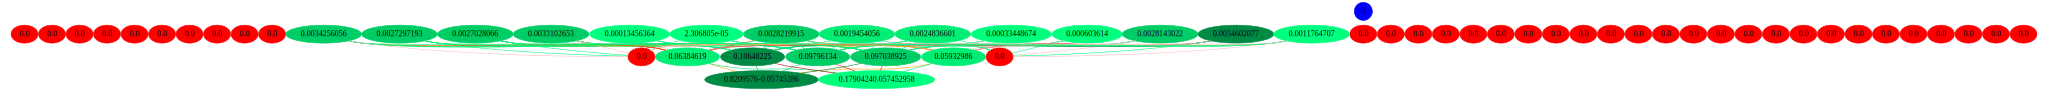

In [10]:
s = 19
e = 20
#for i in range(len(yt) -1):
#    p = nm.predict(xt[i:i+1])
#    l = yt[i:i + 1]
#    print(p)
#    if l == 1 and p[0][0] > p[0][1]:
#        s = i
#        e = i + 1
#        break
x1 = xt[ s:e]
y1 = yt[ s:e]
print(y1)
print(x.shape)
dot, A = vispredict(nm,x1,y1,7,7)
print(nm.predict(x1),y1)
dot

In [11]:
dot.render('onewn.gv')

'onewn.gv.png'

In [307]:
nm.layers[2].get_weights()

[array([[ 0.4099009 , -0.54588801],
        [-0.28843811, -0.48390958],
        [ 4.92763853, -3.7717135 ],
        [-0.30205578, -0.22682077],
        [-0.13152392, -0.59449071],
        [-0.75612068, -0.61562115],
        [ 4.82003736, -3.98491478]], dtype=float32),
 array([-0.54570806,  0.54570824], dtype=float32)]

In [309]:
v = -0.22682077*0.109194 + -0.59449071*0.112141 + 0.545078
print(v)

0.45364375013050995


[1]
(1938, 7, 7)
(49, 7)
0.0038985 0.0295627 0.641163
(7,)  Here
0.0100763 -0.0131601 MINMAX W
0.142493 -0.117805 MINMAX W
{'p0', 'n4', 'n3', 'n1', 'n5', 'p2', 'p4', 'p3', 'n0', 'p1'} {'n5', 'n4', 'n3'}
[[ 0.3588365   0.64116347]] [1]


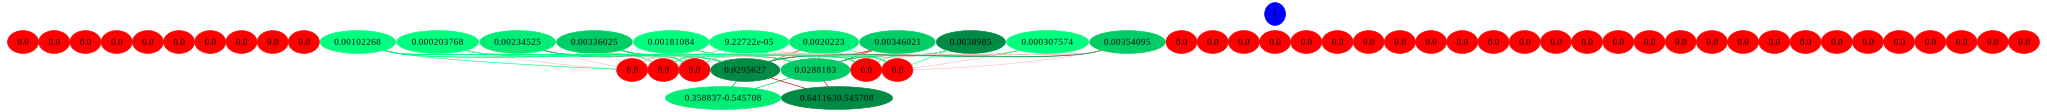

In [326]:
s = 8
e = 9
x1 = xt[ s:e]
y1 = yt[ s:e]
print(y1)
print(x.shape)
dot8, A = vispredict(nm,x1,y1,7,7)
print(nm.predict(x1),y1)
dot8

In [253]:
dot.body

['\tedge [bgcolor="purple:pink" color=yellow nodesep=0]',
 '\tgraph [nodesep=0 ranksep=0]',
 '\tI [label=0 color=blue height=0.2 style=filled width=0.2]',
 '\tx_0 [label="" color=red height=0.2 style=filled width=0.2]',
 '\tx_1 [label="" color=red height=0.2 style=filled width=0.2]',
 '\tx_2 [label="" color=red height=0.2 style=filled width=0.2]',
 '\tx_3 [label="" color=red height=0.2 style=filled width=0.2]',
 '\tx_4 [label="" color=red height=0.2 style=filled width=0.2]',
 '\tx_5 [label="" color=red height=0.2 style=filled width=0.2]',
 '\tx_6 [label="" color=red height=0.2 style=filled width=0.2]',
 '\tx_7 [label="" color=red height=0.2 style=filled width=0.2]',
 '\tx_8 [label="" color=red height=0.2 style=filled width=0.2]',
 '\tx_9 [label="" color=red height=0.2 style=filled width=0.2]',
 '\tx_10 [label="" color=springgreen2 fillcolor=springgreen2 height=0.2 style=filled width=0.2]',
 '\tx_11 [label="" color=springgreen2 fillcolor=springgreen2 height=0.2 style=filled width=0.2]',

In [28]:
from collections import defaultdict 

class NGraph:
    def __init__(self):
        self.graph = defaultdict(dict)
    def addEdge(self, u, v, w):
        self.graph[u][v] = w
    def visit(self):
        for u in self.graph:
            for v in self.graph[u]:
                print(u, v, self.graph[u][v])

In [17]:
def vispredictwights(nm, x, y,img_rows = 28, img_cols = 28):
    w1,b1 = nm.layers[1].get_weights()
    w2,b2 = nm.layers[2].get_weights()
    W1 = np.vstack([w1])
    print(W1.shape)
    X = x.reshape(img_rows*img_cols,)
    X1 = np.dot(X,W1)
    X1 = np.add(X1, b1)
    X1[X1<0]=0
    W2 = np.vstack([w2])
    X2 = np.dot(X1,W2)
    X2 = np.add(X2,b2)
    X2 = softmax(X2)
    dot = Graph(format='png')
    #dot.attr(bgcolor='purple:pink', kw = "edge", style = "invis",nodesep = "0")
    dot.attr(bgcolor='purple:pink', kw = "edge", color = "yellow",nodesep = "0")
    dot.attr(kw = "graph", nodesep = "0", ranksep = "0")
    
    color = ["red","green"]
    green = ["springgreen","springgreen1","springgreen2","springgreen3","springgreen4"]
    edgep = ["springgreen","springgreen1","springgreen2","springgreen3","springgreen4"]
    edgen = ["rosybrown1", "salmon", "orange", "orangered", "red", "red3"]
    dot.node('I',str(getLabel(y)),color = "blue",style = "filled",**{'width':str(.2), 'height':str(.2)})
    maxa = np.amax(X)
    maxc = np.amax(W1)
    maxd = np.amax(W2)
    print(maxa,maxc,maxd)
    A = []
    s = .2
    
    
    for i in range(X.shape[0]):
        if X[i] > 0:
            ind = int((X[i])//(maxa/4))
            #print(ind,X[i])
            c = green[ind]
            dot.node('x_'+str(i), "", color = "black",fillcolor = "black", style  = "filled",**{'width':str(s), 'height':str(s)})
        else :
            dot.node('x_'+str(i), "", color = "black", style  = "filled",**{'width':str(s), 'height':str(s)})
    E = []
    total = 0
    for j in range(X.shape[0]):
        total += 1
        #if X[j] > 0:
        #E.append(('I','x_'+str(j))) # May need uncommenting
        dot.edge('I','x_'+str(j), style ="invis")
        

    #print(len(E),total,100*len(E)/total)
    #A.append(100*len(E)/total)
    #dot.edges(E) # My need uncommenting
    for i in range(X1.shape[0]):
        if X1[i] > 0:
            ind = int((X1[i])//(maxc/4))
            c = green[ind]
            dot.node('x1_'+str(i), "", color = "black", fillcolor = "black",style  = "filled",**{'width':str(s), 'height':str(s)})
        else :
            dot.node('x1_'+str(i),"", color = "black", fillcolor = "black", style  = "filled",**{'width':str(s), 'height':str(s)})

    E1 = []
    total = 0
    print(X1.shape," Here")
    minw = 0
    maxw = -1
    indices1 = []
    
    # Getting max w phase
    for j in range(W1.shape[1]):
        for i in range(X.shape[0]):
            if True:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = W1[i][j]
                maxw = max(maxw,w)
                minw = min(w, minw)
                sw = w *255
    
    for j in range(W1.shape[1]):
        for i in range(X.shape[0]):
            total += 1
            if True:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = W1[i][j]
                sw = w *255
                if sw <= 0:
                    ind = int(abs(sw)/((abs(minw) * 255)/5))
                    c = edgen[ind]
                    dot.edge('x_'+str(i),'x1_'+str(j), color = c)
                    indices1.append("n{}".format(ind))
                else:
                    ind = int(sw/((maxw * 255)/4))
                    #print(ind)
                    c = edgep[ind]
                    dot.edge('x_'+str(i),'x1_'+str(j), color = c)
                    indices1.append("p{}".format(ind))
    # Adding edges
    #print(len(E1),total,100*len(E1)/total)
    print(maxw, minw, "MINMAX W")
    A.append(100*len(E1)/total)
    #dot.edges(E1) # May need uncommenting
    for i in range(X2.shape[0]):
        if X2[i] > 0:
            ind = int((X2[i])//(maxd/4))
            c = green[ind]
            dot.node('x2_'+str(i), "", color = "black", fillcolor = "black", style  = "filled",**{'width':str(s), 'height':str(s)})
        else :
            dot.node('x2_'+str(i), "", color = "black", fillcolor = "black",style  = "filled",**{'width':str(s), 'height':str(s)})
    E2 = []
    total = 0
    minw = 0
    maxw = -1
    for j in range(W2.shape[1]):
        for i in range(X1.shape[0]):
            if True:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = W2[i][j]
                maxw = max(maxw,w)
                minw = min(w, minw)
                sw = w *255
        
    indices2 = []
    for j in range(W2.shape[1]):
        for i in range(X1.shape[0]):
            total += 1
            if True:
                w = W2[i][j]
                sw = w *255
                if sw <= 0:
                    ind = int(abs(sw)/((abs(minw) * 255)/5))
                    c = edgen[ind]
                    dot.edge('x1_'+str(i),'x2_'+str(j),color = c)
                    indices2.append("n{}".format(ind))
                else:
                    ind = int(sw/((maxw* 255)/4))
                    #print(ind)
                    c = edgep[ind]
                    dot.edge('x1_'+str(i),'x2_'+str(j),color = c)
                    indices2.append("n{}".format(ind))

                #E2.append(('x1_'+str(i),'x2_'+str(j))) # To be uncommented if needed 
    #print(len(E2), total, 100*len(E2)/total)
    print(maxw, minw, "MINMAX W")
    indices1 = set(indices1)
    indices2 = set(indices2)
    print(indices1, indices2)
    A.append(100*len(E2)/total)
    #dot.edges(E2) # To be uncommented if needed 
    return dot, A


def vispredict(nm, x, y,img_rows = 28, img_cols = 28):
    graph = NGraph()
    w1,b1 = nm.layers[1].get_weights()
    w2,b2 = nm.layers[2].get_weights()
    W1 = np.vstack([w1])
    print(W1.shape)
    X = x.reshape(img_rows*img_cols,)
    X1 = np.dot(X,W1)
    X1 = np.add(X1, b1)
    X1[X1<0]=0
    W2 = np.vstack([w2])
    X2 = np.dot(X1,W2)
    X2 = np.add(X2,b2)
    X2 = softmax(X2)
    dot = Graph(format='png')
    #dot.attr(bgcolor='purple:pink', kw = "edge", style = "invis",nodesep = "0")
    dot.attr(bgcolor='purple:pink', kw = "edge", color = "yellow",nodesep = "0")
    dot.attr(kw = "graph", nodesep = "0", ranksep = "0")
    
    color = ["red","green"]
    green = ["springgreen","springgreen1","springgreen2","springgreen3","springgreen4"]
    edgep = ["springgreen","springgreen1","springgreen2","springgreen3","springgreen4"]
    edgen = ["rosybrown1", "salmon", "orange", "orangered", "red", "red3"]
    dot.node('I',str(getLabel(y)),color = "blue",style = "filled",**{'width':str(.2), 'height':str(.2)})
    maxa = np.amax(X)
    maxc = np.amax(X1)
    maxd = np.amax(X2)
    print(maxa,maxc,maxd)
    A = []
    s = .2
    
    
    for i in range(X.shape[0]):
        if X[i] > 0:
            ind = int((X[i])//(maxa/4))
            #print(ind,X[i])
            c = green[ind]
            dot.node('x_'+str(i), "", color = c,fillcolor = c, style  = "filled",**{'width':str(s), 'height':str(s)})
        else :
             dot.node('x_'+str(i),"", color = color[0], style  = "filled",**{'width':str(s), 'height':str(s)})
    E = []
    total = 0
    for j in range(X.shape[0]):
        total += 1
        #if X[j] > 0:
        #E.append(('I','x_'+str(j))) # May need uncommenting
        dot.edge('I','x_'+str(j), style ="invis")
        

    #print(len(E),total,100*len(E)/total)
    #A.append(100*len(E)/total)
    #dot.edges(E) # My need uncommenting
    for i in range(X1.shape[0]):
        if X1[i] > 0:
            ind = int((X1[i])//(maxc/4))
            c = green[ind]
            dot.node('x1_'+str(i), "", color = c, fillcolor = c,style  = "filled",**{'width':str(s), 'height':str(s)})
        else :
             dot.node('x1_'+str(i), "", color = color[0], fillcolor = color[0], style  = "filled",**{'width':str(s), 'height':str(s)})

    E1 = []
    total = 0
    print(X1.shape," Here")
    minw = 0
    maxw = -1
    indices1 = []
    
    # Getting max w phase
    for j in range(X1.shape[0]):
        for i in range(X.shape[0]):
            if X[i] > 0:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = np.multiply(W1[i][j], X[i])
                maxw = max(maxw,w)
                minw = min(w, minw)
                sw = w *255
    
    for j in range(X1.shape[0]):
        for i in range(X.shape[0]):
            total += 1
            if X[i] > 0:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = np.multiply(W1[i][j], X[i])
                graph.addEdge(('x_'+str(i),0),('x1_'+str(j),1),w)
                sw = w *255
                if sw <= 0:
                    ind = int(abs(sw)/((abs(minw) * 255)/5))
                    c = edgen[ind]
                    dot.edge('x_'+str(i),'x1_'+str(j), color = c)
                    indices1.append("n{}".format(ind))
                else:
                    ind = int(sw/((maxw * 255)/4))
                    #print(ind)
                    c = edgep[ind]
                    dot.edge('x_'+str(i),'x1_'+str(j), color = c)
                    
                    indices1.append("p{}".format(ind))
    # Adding edges
    #print(len(E1),total,100*len(E1)/total)
    print(maxw, minw, "MINMAX W")
    A.append(100*len(E1)/total)
    #dot.edges(E1) # May need uncommenting
    for i in range(X2.shape[0]):
        if X2[i] > 0:
            ind = int((X2[i])//(maxd/4))
            c = green[ind]
            dot.node('x2_'+str(i), "", color = c, fillcolor = c, style  = "filled",**{'width':str(s), 'height':str(s)})
        else :
            dot.node('x2_'+str(i), "", color = color[0], fillcolor = color[0],style  = "filled",**{'width':str(s), 'height':str(s)})
    E2 = []
    total = 0
    minw = 0
    maxw = -1
    for j in range(X2.shape[0]):
        for i in range(X1.shape[0]):
            if X1[i] > 0:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = np.multiply(W2[i][j], X1[i])
                maxw = max(maxw,w)
                minw = min(w, minw)
                sw = w *255
        
    indices2 = []
    for j in range(X2.shape[0]):
        for i in range(X1.shape[0]):
            total += 1
            if X1[i] > 0:
                w = np.multiply(W2[i][j], X1[i])
                sw = w *255
                graph.addEdge(('x1_'+str(i),0),('x2_'+str(j),1),w)
                if sw <= 0:
                    ind = int(abs(sw)/((abs(minw) * 255)/5))
                    c = edgen[ind]
                    dot.edge('x1_'+str(i),'x2_'+str(j),color = c)
                    indices2.append("n{}".format(ind))
                else:
                    ind = int(sw/((maxw* 255)/4))
                    #print(ind)
                    c = edgep[ind]
                    dot.edge('x1_'+str(i),'x2_'+str(j),color = c)
                    indices2.append("n{}".format(ind))

                #E2.append(('x1_'+str(i),'x2_'+str(j))) # To be uncommented if needed 
    #print(len(E2), total, 100*len(E2)/total)
    print(maxw, minw, "MINMAX W")
    indices1 = set(indices1)
    indices2 = set(indices2)
    print(indices1, indices2)
    A.append(100*len(E2)/total)
    #dot.edges(E2) # To be uncommented if needed 
    return dot, A, graph

In [239]:
dot.render('oner.gv')

'/Users/mislam/Desktop/mlpl/Network slicing/one.gv.png'

(49, 7)
0.0034602077 4.5887494 4.536491
(7,)  Here
4.5887494 -4.5671906 MINMAX W
4.536491 -4.4560113 MINMAX W
{'p2', 'n4', 'n1', 'n3', 'n0', 'p3', 'p1', 'p4', 'n5', 'n2', 'p0'} {'n0', 'n5', 'n3', 'n4'}


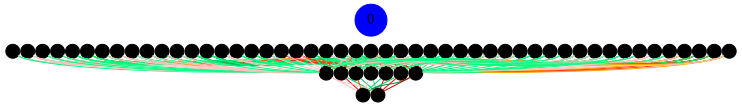

In [13]:
dots , As = vispredictwights(nm,x1,y1,7,7)
dots

In [343]:
dots.render('staticr.gv')

'/Users/mislam/Desktop/mlpl/Network slicing/static.gv.png'

(49, 7)
0.0034602077 0.10648225 0.8209576
(7,)  Here
0.015453361 -0.015103478 MINMAX W
0.4402162 -0.45427552 MINMAX W
{'n4', 'p2', 'n1', 'n3', 'n0', 'p3', 'p1', 'p4', 'n5', 'n2', 'p0'} {'n3', 'n5', 'n2', 'n4'}


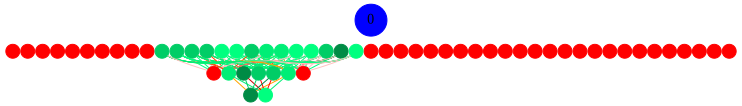

In [29]:
dot8, A, G = vispredict(nm,x1,y1,7,7)
dot8

In [30]:
G.visit()

('x_10', 0) ('x1_0', 1) -0.0055630226
('x_10', 0) ('x1_1', 1) -0.004490726
('x_10', 0) ('x1_2', 1) 0.0008480958
('x_10', 0) ('x1_3', 1) 0.0052909967
('x_10', 0) ('x1_4', 1) 0.0056903656
('x_10', 0) ('x1_5', 1) 0.0049397317
('x_10', 0) ('x1_6', 1) 0.0005014056
('x_11', 0) ('x1_0', 1) -0.008521068
('x_11', 0) ('x1_1', 1) -0.010940601
('x_11', 0) ('x1_2', 1) 0.00014811492
('x_11', 0) ('x1_3', 1) 0.010283883
('x_11', 0) ('x1_4', 1) 0.009029467
('x_11', 0) ('x1_5', 1) 0.008811967
('x_11', 0) ('x1_6', 1) 0.00027369545
('x_16', 0) ('x1_0', 1) -0.009284805
('x_16', 0) ('x1_1', 1) -0.009073487
('x_16', 0) ('x1_2', 1) -0.00076528155
('x_16', 0) ('x1_3', 1) 0.0089405645
('x_16', 0) ('x1_4', 1) 0.009108106
('x_16', 0) ('x1_5', 1) 0.0090701645
('x_16', 0) ('x1_6', 1) -0.00030202308
('x_17', 0) ('x1_0', 1) -0.00017551275
('x_17', 0) ('x1_1', 1) -0.00020688045
('x_17', 0) ('x1_2', 1) -3.159509e-05
('x_17', 0) ('x1_3', 1) 0.00018986811
('x_17', 0) ('x1_4', 1) 0.00024437706
('x_17', 0) ('x1_5', 1) 0.00

In [344]:
dot8.render('/Users/mislam/Desktop/mlpl/Network slicing/eight.gv')

'/Users/mislam/Desktop/mlpl/Network slicing/eight.gv.png'

In [15]:
print(dot8)

graph {
	edge [bgcolor="purple:pink" color=yellow nodesep=0]
	graph [nodesep=0 ranksep=0]
	I [label=0 color=blue height=0.2 style=filled width=0.2]
	x_0 [label="" color=red height=0.2 style=filled width=0.2]
	x_1 [label="" color=red height=0.2 style=filled width=0.2]
	x_2 [label="" color=red height=0.2 style=filled width=0.2]
	x_3 [label="" color=red height=0.2 style=filled width=0.2]
	x_4 [label="" color=red height=0.2 style=filled width=0.2]
	x_5 [label="" color=red height=0.2 style=filled width=0.2]
	x_6 [label="" color=red height=0.2 style=filled width=0.2]
	x_7 [label="" color=red height=0.2 style=filled width=0.2]
	x_8 [label="" color=red height=0.2 style=filled width=0.2]
	x_9 [label="" color=red height=0.2 style=filled width=0.2]
	x_10 [label="" color=springgreen3 fillcolor=springgreen3 height=0.2 style=filled width=0.2]
	x_11 [label="" color=springgreen3 fillcolor=springgreen3 height=0.2 style=filled width=0.2]
	x_12 [label="" color=red height=0.2 style=filled width=0.2]
	x_13

[]
(2115, 7, 7)
(49, 128)
0.00359093 0.220274 0.971782
(128,)  Here
0.00196071 -0.00315529 MINMAX W
0.114725 -0.0826673 MINMAX W
{'p0', 'n4', 'n3', 'n1', 'p4', 'p2', 'n5', 'p3', 'n0', 'n2', 'p1'} {'n4', 'n3', 'n1', 'n5', 'n0', 'n2'}


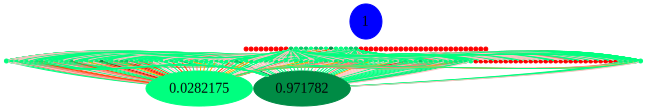

In [192]:
x1 = xt[ 3:4]
y1 = yt[3:3]
print(y1)
print(x.shape)
dot, A = vispredict(nm,x1,y1,7,7)
dot

In [139]:
dot.render('zero.dot')

'/Users/mislam/Desktop/mlpl/Network slicing/zero.dot.png'

In [46]:
a = [0, 0]
if (y1 == np.array(a)).all():
    print("One")
else:
    print("False")

False


In [26]:
zeros = []
count = 0
print(yt)
for i in range(len(yt)):
    if yt[i] == [0 1]:
        zeros.append((xt[i:i+1], yt[i:i+1]))
        count += 1
        if count == 5:
            break
ones = [] 
count = 0
for i in range(len(yt)):
    if yt[i] == [1 0]:
        ones.append((xt[i:i+1], yt[i:i+1]))
        count += 1
        if count == 5:
            break

SyntaxError: invalid syntax (<ipython-input-26-1785f4bd945a>, line 5)

In [11]:
for i in range(0,len(zeros)):
    x, y = zeros[i]
    print(x.shape)
    dot, A = vispredict(nm,x,y)
    print(A)
    dot.render('C:/Users/johir/Desktop/mlpl/NetworkSlice/zero{0}'.format(i))
    #render('dot', 'png', 'C:/Users/johir/Desktop/mlpl/NetworkSlice/zero{0}.gv'.format(i))
for i in range(0,len(ones)):
    x, y = ones[i]
    print(x.shape)
    dot, A = vispredict(nm,x,y)
    print(A)
    dot.render('C:/Users/johir/Desktop/mlpl/NetworkSlice/one{0}'.format(i))

NameError: name 'zeros' is not defined

In [128]:
import pygraphviz as pgv
G = pgv.AGraph("one.gv")

In [129]:
G

<AGraph <Swig Object of type 'Agraph_t *' at 0x18238cc330>>

In [131]:
G.layout(prog = "dot")
G.draw('file.png')

/Users/mislam/anaconda/lib/python3.6/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: Could not load "/Users/mislam/anaconda/lib/graphviz/libgvplugin_pango.6.dylib" - file not found

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/Users/mislam/anaconda/lib/python3.6/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: Could not load "/Users/mislam/anaconda/lib/graphviz/libgvplugin_pango.6.dylib" - file not found

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


In [140]:
import networkx as nx
from networkx.drawing.nx_pydot import read_dot
G = nx.Graph(read_dot("zero.dot"))

In [135]:
G

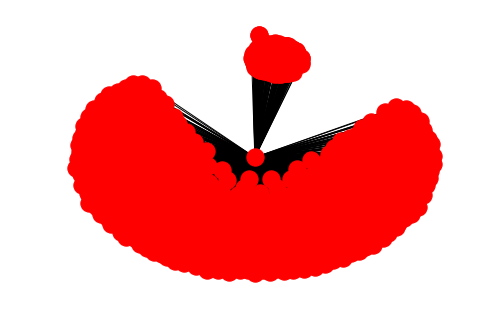

In [142]:
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()

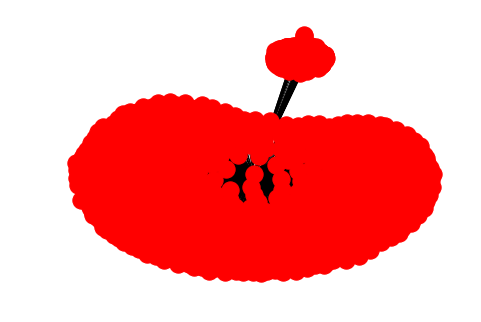

In [137]:
import networkx as nx
from networkx.drawing.nx_pydot import read_dot
G = nx.Graph(read_dot("zero.gv"))
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()

In [292]:
import pydot as pt
def vispredictpydot(nm, x, y):
    w1,b1 = nm.layers[1].get_weights()
    w2,b2 = nm.layers[2].get_weights()
    W1 = np.vstack([w1])
    X = x.reshape(784,)
    X1 = np.dot(X,W1)
    X1 = np.add(X1, b1)
    X1[X1<0]=0
    W2 = np.vstack([w2])
    X2 = np.dot(X1,W2)
    X2 = np.add(X2,b2)
    X2 = softmax(X2)
    dot = pt.Dot(graphtype = "graph")
    #dot.attr(bgcolor='purple:pink', kw = "edge", style = "invis",nodesep = "0")
    #dot.attr(bgcolor='purple:pink', kw = "edge", color = "yellow",nodesep = "0")
    #dot.attr(kw = "graph", nodesep = "0", ranksep = "0")
    
    color = ["red","green"]
    green = ["springgreen","springgreen1","springgreen2","springgreen3","springgreen4"]
    edgep = ["springgreen","springgreen1","springgreen2","springgreen3","springgreen4"]
    edgen = ["rosybrown1", "salmon", "orange", "orangered", "red", "red3"]
    node = pt.Node('I',str(getLabel(y)),color = "blue",style = "filled",**{'width':str(.2), 'height':str(.2)})
    dot.add_node(node)
    maxa = np.amax(X)
    maxc = np.amax(X1)
    maxd = np.amax(X2)
    print(maxa,maxc,maxd)
    A = []
    s = 0.05
    
    
    for i in range(X.shape[0]):
        if X[i] > 0:
            ind = int((X[i])//(maxa/4))
            #print(ind,X[i])
            c = green[ind]
            node = pt.Node('x_'+str(i), '', color = c,fillcolor = c, style  = "filled",**{'width':str(s), 'height':str(s)})
            dot.add_node(node)
        else :
            node = pt.Node('x_'+str(i), '', color = color[0], style  = "filled",**{'width':str(s), 'height':str(s)})
            dot.add_node(node)
    E = []
    total = 0
    for j in range(X.shape[0]):
        total += 1
        #if X[j] > 0:
        #E.append(('I','x_'+str(j))) # May need uncommenting
        e = pt.Edge('I','x_'+str(j), style ="invis")
        dot.add_edge(e)
        

    #print(len(E),total,100*len(E)/total)
    #A.append(100*len(E)/total)
    #dot.edges(E) # My need uncommenting
    for i in range(X1.shape[0]):
        if X1[i] > 0:
            ind = int((X1[i])//(maxc/4))
            c = green[ind]
            node = pt.Node('x1_'+str(i), '', color = c, fillcolor = c,style  = "filled",**{'width':str(s), 'height':str(s)})
            dot.add_node(node)
        else :
            node = pt.Node('x1_'+str(i), '', color = color[0], fillcolor = color[0], style  = "filled",**{'width':str(s), 'height':str(s)})
            dot.add_node(node)
    E1 = []
    total = 0
    print(X1.shape," Here")
    minw = 0
    maxw = -1
    indices1 = []
    
    # Getting max w phase
    for j in range(X1.shape[0]):
        for i in range(X.shape[0]):
            if X[i] > 0:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = np.multiply(W1[i][j], X[i]) + b1[i]
                maxw = max(maxw,w)
                minw = min(w, minw)
                sw = w *255
    
    for j in range(X1.shape[0]):
        for i in range(X.shape[0]):
            total += 1
            if X[i] > 0:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = np.multiply(W1[i][j], X[i])
                sw = w *255 + b1[i]
                if sw <= 0:
                    ind = int(abs(sw)/((abs(minw) * 255)/5))
                    c = edgen[ind]
                    e = pt.Edge('x_'+str(i),'x1_'+str(j), color = c)
                    dot.add_edge(e)
                    indices1.append("n{}".format(ind))
                else:
                    ind = int(sw/((maxw * 255)/4))
                    #print(ind)
                    c = edgep[ind]
                    e = pt.Edge('x_'+str(i),'x1_'+str(j), color = c)
                    dot.add_edge(e)
                    indices1.append("p{}".format(ind))
    # Adding edges
    #print(len(E1),total,100*len(E1)/total)
    print(maxw, minw, "MINMAX W")
    A.append(100*len(E1)/total)
    #dot.edges(E1) # May need uncommenting
    for i in range(X2.shape[0]):
        if X2[i] > 0:
            ind = int((X2[i])//(maxd/4))
            c = green[ind]
            node = pt.Node('x2_'+str(i), str(X2[i]), color = c, fillcolor = c, style  = "filled",**{'width':str(s), 'height':str(s)})
            dot.add_node(node)
        else :
            node = pt.Node('x2_'+str(i), str(X2[i]), color = color[0], fillcolor = color[0],style  = "filled",**{'width':str(s), 'height':str(s)})
            dot.add_node(node)
    E2 = []
    total = 0
    minw = 0
    maxw = -1
    for j in range(X2.shape[0]):
        for i in range(X1.shape[0]):
            if X1[i] > 0:
                #E1.append(('x_'+str(i),'x1_'+str(j))) # May need uncommenting
                w = np.multiply(W2[i][j], X1[i]) + b2[i]
                maxw = max(maxw,w) 
                minw = min(w, minw)
                sw = w *255
        
    indices2 = []
    for j in range(X2.shape[0]):
        for i in range(X1.shape[0]):
            total += 1
            if X1[i] > 0:
                w = np.multiply(W2[i][j], X1[i]) + b2[i]
                sw = w *255
                if sw <= 0:
                    ind = int(abs(sw)/((abs(minw) * 255)/5))
                    c = edgen[ind]
                    e = pt.Edge('x1_'+str(i),'x2_'+str(j),color = c)
                    dot.add_edge(e)
                    indices2.append("n{}".format(ind))
                else:
                    ind = int(sw/((maxw* 255)/4))
                    #print(ind)
                    c = edgep[ind]
                    e = pt.edge('x1_'+str(i),'x2_'+str(j),color = c)
                    dot.add_edge(e)
                    indices2.append("n{}".format(ind))

                #E2.append(('x1_'+str(i),'x2_'+str(j))) # To be uncommented if needed 
    #print(len(E2), total, 100*len(E2)/total)
    print(maxw, minw, "MINMAX W")
    indices1 = set(indices1)
    indices2 = set(indices2)
    print(indices1, indices2)
    A.append(100*len(E2)/total)
    #dot.edges(E2) # To be uncommented if needed 
    return dot, A

In [32]:
nm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Flatten)              (None, 784)               0         
_________________________________________________________________
H (Dense)                    (None, 128)               100480    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
